<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Student name: <span style="color:blue"><b>Sashank Silwal</b></span><br/>
Grade: <span style="color:blue"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 3</span>
# <span style="color:green">Google Autocomplete Networks of Nationalities and Stereotypes

<span style="color:blue"><b>Install the nltk module in a (new) terminal window running the following command:
    
<span style="color:blue"><b>conda install -c anaconda nltk
    
<span style="color:blue"><b>Moreover, if any module X is missing (and thus next cell gives an error), google "conda install X" and get the exact command to run it as above.

In [1]:
import requests, ast, operator, math, imp, os, pickle, random, numpy as np, networkx as nx, matplotlib.pyplot as plt  
import nltk
from collections import Counter, OrderedDict, defaultdict
from itertools import combinations
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

<span style="color:blue"><b>The *.pic file should be located in the same folder with this notebook.

In [2]:
p="/Users/sashanksilwal/Downloads/GoogleAutocompleteNationalStereotypes.pic.txt"
with open(p, "rb") as f:
    ddn=pickle.load(f)
  
dddn=dict()
ste=[]
for k,v in ddn.items():
    if len(v[1])>0:
        dddn[k]=v[1]
        if v not in ste:
            ste.append(v)
print len(dddn), len(ste)

143 143


In [3]:
nationalities=dddn.keys()
nationalities=sorted(nationalities)
print len(nationalities)
stereotypes=[]
for k,v in dddn.items():
    for vv in v:
        if vv not in stereotypes:
            stereotypes.append(vv)
stereotypes=sorted(stereotypes)
print len(stereotypes)

143
533


In [4]:
nationalities

['afghan',
 'albanian',
 'algerian',
 'american',
 'angolan',
 'armenian',
 'australian',
 'austrian',
 'azerbaijani',
 'bahamian',
 'bahraini',
 'bangladeshi',
 'barbadian',
 'belarusian',
 'belgian',
 'belizean',
 'bhutanese',
 'bolivian',
 'bosnian',
 'brazilian',
 'british',
 'bulgarian',
 'burmese',
 'burundian',
 'cambodian',
 'canadian',
 'cape verdean',
 'central african',
 'chilean',
 'chinese',
 'colombian',
 'congolese',
 'costa rican',
 'croatian',
 'cuban',
 'cypriot',
 'czech',
 'danish',
 'djibouti',
 'dominican',
 'dutch',
 'egyptian',
 'emiratis',
 'eritrean',
 'estonian',
 'ethiopian',
 'fijian',
 'filipino',
 'finnish',
 'french',
 'gambian',
 'georgian',
 'german',
 'ghanaian',
 'greek',
 'guatemalan',
 'guyanese',
 'haitian',
 'honduran',
 'hungarian',
 'icelander',
 'indian',
 'indonesian',
 'iranian',
 'iraqi',
 'irish',
 'israeli',
 'italian',
 'jamaican',
 'japanese',
 'jordanian',
 'kenyan',
 'kuwaiti',
 'kyrgyz',
 'latvian',
 'lebanese',
 'liberian',
 'libyan

<span style="color:blue"><b>In the sequel, you may proceed in one of two ways:

<span style="color:blue"><b>1. You may select randomly 25 nationalities, as it is done in next cell.
    
<span style="color:blue"><b>2. You may select your own 25 nationalities by copying and pasting nationalities in a list called nationalities as it exists empty in the cell following the next one. That cell is commented and if you intend to follow this way, you should uncomment it and add manually your choices of 25 nationalities inside the square brackets (you need to keep each nationality inside quotes as it appears in the previous list of nationalities). 

In [5]:
# nationalities_sample = sorted(random.sample(nationalities,25))

In [6]:
# Run this!

# sorted(nationalities_sample)

In [7]:
# # Enter 25 nationalities inside [.] below:

nationalities_sample = [ 'mongolian','american', 'peruvian','bosnian', 'namibian','azerbaijani', 'japanese', 'marshallese', 'omani', 'iraqi', 'british', 'tunisian', 'fijian', 'cypriot', 'dominican', 'syrian', 'mauritian', 'micronesian', 'serbian', 'south korean','indian','colombian','dutch','saudi','turkish']

 







In [8]:
# # Run this!

sorted(nationalities_sample)


['american',
 'azerbaijani',
 'bosnian',
 'british',
 'colombian',
 'cypriot',
 'dominican',
 'dutch',
 'fijian',
 'indian',
 'iraqi',
 'japanese',
 'marshallese',
 'mauritian',
 'micronesian',
 'mongolian',
 'namibian',
 'omani',
 'peruvian',
 'saudi',
 'serbian',
 'south korean',
 'syrian',
 'tunisian',
 'turkish']

In [9]:
# Run this!

dddns={k:v for k,v in dddn.items() if k in nationalities_sample}
eds=[]
for k,v in dddns.items():
    for vv in v:
        eds.append((k,vv))
G=nx.Graph()
G.add_edges_from(eds)
nas=[]
for a in G.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    G.remove_node(x)  
Gn=[n for n in G.nodes() if n in nationalities_sample]
Ga=[n for n in G.nodes() if n not in nationalities_sample]
print "The Google Autocomplete graph of %i nationalities has" %len(Gn)
print "%i nodes (%i nationalities and %i stereotypes) and" %(len(G.nodes()),len(Gn),len(Ga))
print len(G.edges()), "edges" 
if nx.is_bipartite(G)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(G)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(G), "connected components"

The Google Autocomplete graph of 25 nationalities has
159 nodes (25 nationalities and 134 stereotypes) and
161 edges
This graph is bipartite
This graph is not connected and has 8 connected components


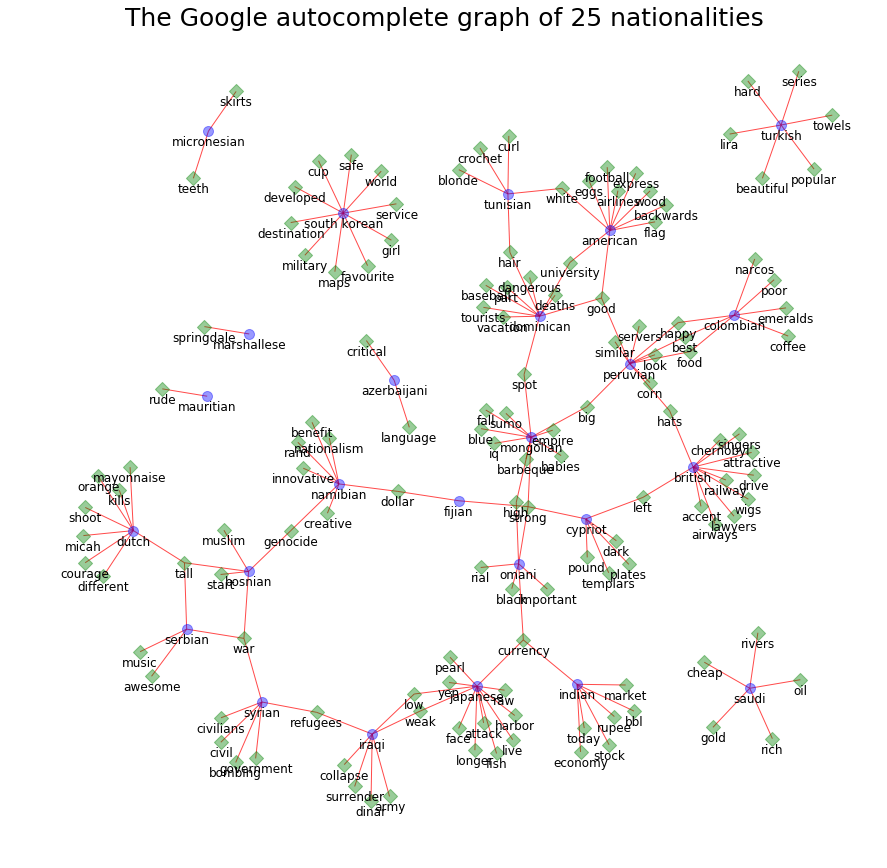

In [10]:
# Run this!

pos=graphviz_layout(G)
# pos=nx.spring_layout(G,k=0.15) 
fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos=pos,nodelist=Gn,node_color='b',node_size=100,alpha=0.4); 
nx.draw_networkx_nodes(G,pos=pos,nodelist=Ga,node_shape="D",node_color='g',node_size=100,alpha=0.4); 
nx.draw_networkx_edges(G,pos=pos,edge_color='r',alpha=0.7); 
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=15);
sst="The Google autocomplete graph of %i nationalities" %len(Gn)
fig.suptitle(sst,x=0.5, y=.90, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -16 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(G, yoffset);
plt.show()

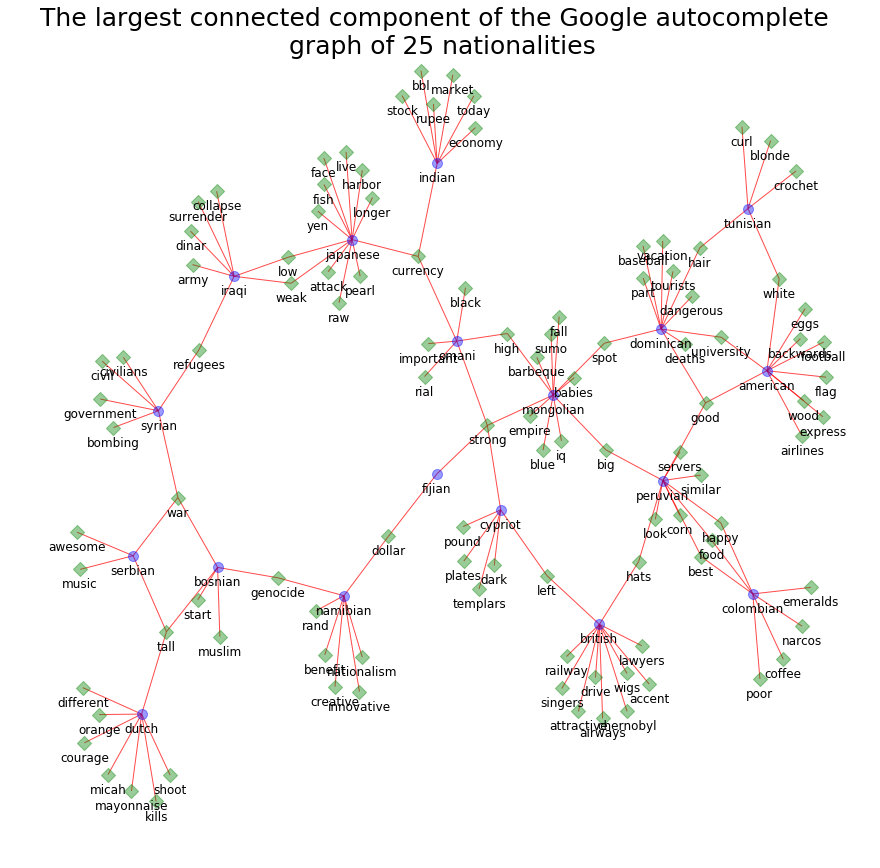

In [11]:
# Run this!

Gg = max(nx.connected_component_subgraphs(G), key=len)
pos=graphviz_layout(Gg)
# pos=nx.spring_layout(Gg,k=0.15) 
Ggn=[n for n in Gg.nodes() if n in nationalities_sample]
Gga=[n for n in Gg.nodes() if n not in nationalities_sample]
fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gg,pos=pos,nodelist=Ggn,node_color='b',node_size=100,alpha=0.4); #font_size=20,
nx.draw_networkx_nodes(Gg,pos=pos,nodelist=Gga,node_shape="D",node_color='g',node_size=100,alpha=0.4); font_size=20,
nx.draw_networkx_edges(Gg,pos=pos,edge_color='r',alpha=0.7); 
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=15);
sst="The largest connected component of the Google autocomplete \n graph of %i nationalities" %len(Gn)
fig.suptitle(sst,x=0.5, y=.90, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -16 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(Gg, yoffset);
plt.show()

In [12]:
# Run this!

Gc = nx.Graph(Gg)
cn=[n for n in Gga if Gc.degree(n)==1] 
Gc.remove_nodes_from(cn)
Gcn=[n for n in Gc.nodes() if n in nationalities_sample]
Gca=[n for n in Gc.nodes() if n not in nationalities_sample]
print "The largest connected component of the Google Autocomplete graph of %i nationalities with all stereotypes having degree larger than 1 has" %len(Gn)
print "%i nodes (%i nationalities and %i stereotypes) and" %(len(Gc.nodes()),len(Gcn),len(Gca))
print len(Gc.edges()), "edges" 
if nx.is_bipartite(Gc)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(Gc)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(Gc), "connected components"

The largest connected component of the Google Autocomplete graph of 25 nationalities with all stereotypes having degree larger than 1 has
39 nodes (18 nationalities and 21 stereotypes) and
48 edges
This graph is bipartite
This graph is connected


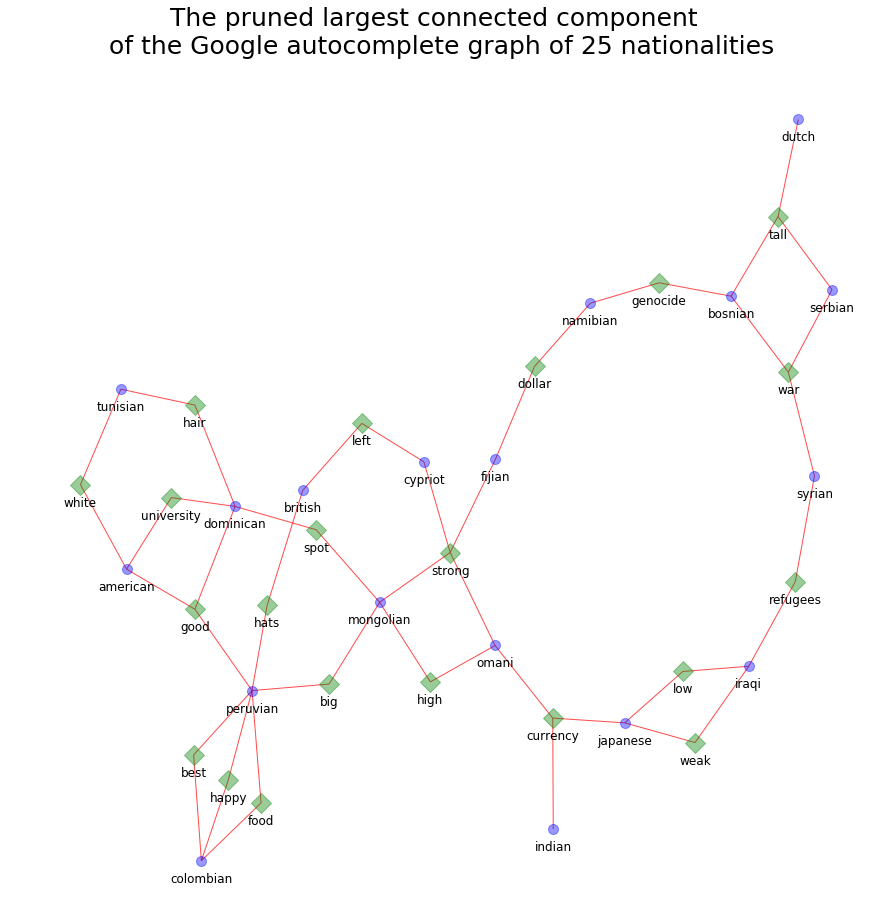

In [13]:
# Run this!

pos=graphviz_layout(Gc)
# pos=nx.spring_layout(Gc,k=0.15) 
labels={}
for i in Gc.nodes():
    labels[i]=i
Gcn=[n for n in Gc.nodes() if n in nationalities_sample]
Gca=[n for n in Gc.nodes() if n not in nationalities_sample]

fig = plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gcn,node_color='b',node_size=100,alpha=0.4);
nx.draw_networkx_nodes(Gc,pos=pos,nodelist=Gca,node_shape="D",node_color='g',node_size=200,alpha=0.4);
nx.draw_networkx_edges(Gc,pos=pos,edge_color='r',alpha=0.7); #width=edgewidth,
sst="The pruned largest connected component \n of the Google autocomplete graph of %i nationalities" %len(Gn)
fig.suptitle(sst,x=0.5, y=.95, fontsize=25);
plt.axis('off');
yoffset = {}
y_off = -14 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
font_size=15
nx.draw_networkx_labels(Gc, yoffset);
plt.show()